#### arima-statsmodels

In [1]:
import numpy as np
import pandas as pd

from statsmodels.tsa.api import ARIMA # model adjustment
from statsmodels.stats.api import het_arch, acorr_ljungbox # diagnostics
from statsmodels.graphics.tsaplots import plot_predict # prediction construction

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)
# Не показывать ValueWarning, ConvergenceWarning из statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
warnings.simplefilter('ignore', category=ValueWarning)
warnings.simplefilter('ignore', category=ConvergenceWarning)

In [2]:
y = np.log(web.DataReader(name='GDP', data_source='fred', start='1995-01-01'))

In [4]:
# спецификация модели
mod1 = ARIMA(y, order=(1,0,1), trend='ct', missing='drop')
# подгонка модели на данных
res1 = mod1.fit()
# выводим результаты подгонки
res1.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GDP   No. Observations:                  120
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 348.639
Date:                Tue, 18 Mar 2025   AIC                           -687.277
Time:                        11:26:29   BIC                           -673.340
Sample:                    01-01-1995   HQIC                          -681.617
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9391      0.071    125.723      0.000       8.800       9.078
x1             0.0111      0.001     11.900      0.000       0.009       0.013
ar.L1          0.9511      0.043     22.026      0.000       0.866       1.036
ma.L1         -0.0317      0.074     -0.426      0.670      -0.177       0.114
sigma2         0.0002    8.6e-06     19.985      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5228.94
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):              11.99   Skew:                            -3.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
# спецификация модели
mod2 = ARIMA(y, order=(1,1,0), trend='t', missing='drop')
# подгонка модели на данных
res2 = mod2.fit()
# выводим результаты подгонки
res2.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GDP   No. Observations:                  120
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 345.660
Date:                Tue, 18 Mar 2025   AIC                           -685.320
Time:                        11:34:55   BIC                           -676.983
Sample:                    01-01-1995   HQIC                          -681.935
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0115      0.002      5.763      0.000       0.008       0.015
ar.L1         -0.0684      0.040     -1.717      0.086      -0.146       0.010
sigma2         0.0002   7.84e-06     22.372      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4329.79
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              14.08   Skew:                            -2.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
# спецификация модели
mod3 = ARIMA(y, order=(1,1,1), trend='n', missing='drop')
# подгонка модели на данных
res3 = mod3.fit()
# выводим результаты подгонки
res3.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GDP   No. Observations:                  120
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 342.161
Date:                Tue, 18 Mar 2025   AIC                           -678.322
Time:                        11:35:52   BIC                           -669.985
Sample:                    01-01-1995   HQIC                          -674.937
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9974      0.006    180.010      0.000       0.987       1.008
ma.L1         -0.9527      0.026    -36.197      0.000      -1.004      -0.901
sigma2         0.0002   7.85e-06     23.613      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.83   Jarque-Bera (JB):              4144.93
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):              12.17   Skew:                            -1.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
# спецификация модели
mod4 = ARIMA(y, order=(1,2,0), trend='n', missing='drop')
# подгонка модели на данных
res4 = mod4.fit()
# выводим результаты подгонки
res4.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GDP   No. Observations:                  120
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 320.425
Date:                Tue, 18 Mar 2025   AIC                           -636.850
Time:                        11:36:45   BIC                           -631.309
Sample:                    01-01-1995   HQIC                          -634.600
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5678      0.031    -18.301      0.000      -0.629      -0.507
sigma2         0.0003   1.01e-05     25.187      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   5.46   Jarque-Bera (JB):              7383.00
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              26.41   Skew:                             2.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        41.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Прогнозируем

In [11]:
forecasts = res1.forecast(steps=10)
forecasts

2025-01-01    10.309084
2025-04-01    10.318749
2025-07-01    10.328483
2025-10-01    10.338283
2026-01-01    10.348146
2026-04-01    10.358068
2026-07-01    10.368048
2026-10-01    10.378081
2027-01-01    10.388166
2027-04-01    10.398299
Freq: QS-OCT, Name: predicted_mean, dtype: float64

#### сравним прогнозы из различных моделей

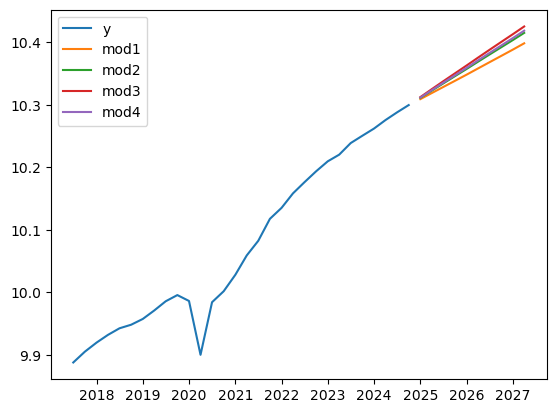

In [13]:
plt.plot(y.tail(30), label='y')
plt.plot(res1.forecast(steps=10), label='mod1')
plt.plot(res2.forecast(steps=10), label='mod2')
plt.plot(res3.forecast(steps=10), label='mod3')
plt.plot(res4.forecast(steps=10), label='mod4')
plt.legend()
plt.show()

### какая модель лучше?

#### ДЗ: раздел 3.2 задача №2 (1(а))

No1.Пусть yt – логарифм US GDP (квартальные данные) с 1995 по
н.в.
1. Подгонка модели заданного порядка
(a) Подгоните модели
Модель | drift/trend | спецификация
ARIMA(1,0,1) | + | yt = α0 + α1t + φyt−1 + ut + θut−1
ARIMA(1,1,0) | + | ∆ yt = α0 + φ∆ yt−1 + ut
ARIMA(1,1,1) | - | ∆ yt = φ∆ yt−1 + ut + θut−1
ARIMA(1,2,0) | - | ∆2 yt = φ∆2 yt−1 + ut
и постройте прогноз на 10 периодов. Значим ли снос/тренд?
(b) Проведите диагностику каждой модели.
(c) Проведите кросс-валидацию каждой модели. Какая предпо-
чтительней